In [105]:
import os
import pandas as pd
%matplotlib inline

In [106]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [107]:
from newsapi import NewsApiClient

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [108]:
# Read your api key environment variable
api_key = 'd68f0670f6d844d8ad1dd0c0e3020a4d'

In [109]:
# Create a newsapi client
api_client = NewsApiClient(api_key=api_key)

In [110]:
# Fetch the Bitcoin news articles
bitcoin_news = api_client.get_everything(q='bitcoin', language='en', page_size=100, sort_by='relevancy')

In [111]:
# Fetch the Ethereum news articles
ethereum_news = api_client.get_everything(q='ethereum',language='en', page_size=100, sort_by='relevancy')

In [112]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []
for article in bitcoin_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiment.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
  
    except AttributeError:
        pass       
    
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiment)
# reorder columns
cols = ['compound', 'negative', 'neutral', 'positive', 'text']
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]
bitcoin_sentiment_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
2,0.0000,0.000,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio..."
3,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
4,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...


In [113]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_news['articles']:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiment.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_sentiment_df = pd.DataFrame(ethereum_sentiment)
# reorder columns
cols = ['compound', 'negative', 'neutral', 'positive', 'text']
ethereum_sentiment_df = ethereum_sentiment_df[cols]
ethereum_sentiment_df.head()

,compound,negative,neutral,positive,text
0,0.000,0.0,1.00,0.00,"Sparrow Exchange, a Bitcoin and Ethereum optio..."
1,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...
2,0.000,0.0,1.00,0.00,TL;DR: The Complete Cryptocurrency Investment ...
3,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
4,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...


In [114]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,compound,negative,neutral,positive
count,95.000000,95.000000,95.000000,95.000000
mean,0.180345,0.029768,0.899653,0.070579
std,0.390565,0.049264,0.075516,0.066769
min,-0.817600,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.855000,0.000000
50%,0.202300,0.000000,0.910000,0.075000
75%,0.507000,0.063000,0.940500,0.090000
max,0.919800,0.215000,1.000000,0.335000


In [115]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,compound,negative,neutral,positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.244876,0.029713,0.885511,0.084745
std,0.385237,0.053339,0.085318,0.073697
min,-0.807400,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.836000,0.000000
50%,0.277800,0.000000,0.874000,0.082500
75%,0.534375,0.055500,0.943750,0.134000
max,0.919800,0.249000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [116]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [117]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
stopwords

<WordListCorpusReader in '/Users/rach.solo/nltk_data/corpora/stopwords'>

In [118]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
# Create a list of the words
    sw = stopwords.words('english')
    
# Convert the words to lowercase/Remove the punctuation/Remove the stop words
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    lower_words = [word.lower() for word in words if word.lower() not in sw]
    
# Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lower_words]
    
    return tokens

In [119]:
# Create a new tokens column for bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df['text'].fillna('').apply(tokenizer)
bitcoin_sentiment_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...,"[tldr, complete, cryptocurrency, investment, b..."
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
2,0.0000,0.000,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio...","[sparrow, exchange, bitcoin, ethereum, option,..."
3,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
4,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."


In [120]:
# Create a new tokens column for ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df['text'].fillna('').apply(tokenizer)
ethereum_sentiment_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.000,0.0,1.00,0.00,"Sparrow Exchange, a Bitcoin and Ethereum optio...","[sparrow, exchange, bitcoin, ethereum, option,..."
1,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...,"[editor, noteandreessen, horowitzscrypto, star..."
2,0.000,0.0,1.00,0.00,TL;DR: The Complete Cryptocurrency Investment ...,"[tldr, complete, cryptocurrency, investment, b..."
3,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [121]:
from collections import Counter
from nltk import ngrams

In [122]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = []

for i in bitcoin_sentiment_df['tokens']:
    bitcoin_words = bitcoin_words + i

bitcoin_ngrams = Counter(ngrams(bitcoin_words,n=2))
print(dict(bitcoin_ngrams))

{('tldr', 'complete'): 1, ('complete', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'bundle'): 1, ('bundle', 'sale'): 1, ('sale', 'june'): 1, ('june', 'saving'): 1, ('saving', 'list'): 1, ('list', 'priceif'): 1, ('priceif', 'believe'): 1, ('believe', 'every'): 1, ('every', 'plot'): 1, ('plot', 'point'): 1, ('point', 'movie'): 1, ('movie', 'social'): 1, ('social', 'network'): 1, ('network', 'mark'): 1, ('mark', 'z'): 1, ('z', 'char'): 1, ('char', 'winklevoss'): 1, ('winklevoss', 'twinsthe'): 1, ('twinsthe', 'brother'): 1, ('brother', 'mark'): 1, ('mark', 'zuckerberg'): 1, ('zuckerberg', 'allegedly'): 1, ('allegedly', 'stole'): 1, ('stole', 'idea'): 1, ('idea', 'facebook'): 1, ('facebook', 'fromare'): 1, ('fromare', 'making'): 1, ('making', 'movie'): 1, ('movie', 'deadline'): 1, ('deadline', 'reported'): 1, ('reported', 'week'): 1, ('week', 'doesnt'): 1, ('doesnt', 'seem'): 1, ('seem', 'masturbatory'): 1, ('masturbatory', 'enough'): 1, ('enough', 'r'): 1, ('r

In [123]:
# Generate the Ethereum N-grams where N=2
ethereum_words = []
for i in ethereum_sentiment_df['tokens']:
    ethereum_words = ethereum_words + i

ethereum_ngrams = Counter(ngrams(ethereum_words,n=2))
print(dict(ethereum_ngrams))

{('sparrow', 'exchange'): 1, ('exchange', 'bitcoin'): 1, ('bitcoin', 'ethereum'): 2, ('ethereum', 'option'): 1, ('option', 'trading'): 1, ('trading', 'platform'): 1, ('platform', 'based'): 1, ('based', 'singapore'): 1, ('singapore', 'announced'): 1, ('announced', 'today'): 2, ('today', 'raised'): 1, ('raised', 'million'): 2, ('million', 'series'): 1, ('series', 'fundingthe'): 1, ('fundingthe', 'round'): 1, ('round', 'led'): 1, ('led', 'hdr'): 1, ('hdr', 'group'): 1, ('group', 'owner'): 1, ('owner', 'cry'): 1, ('cry', 'char'): 1, ('char', 'editor'): 1, ('editor', 'noteandreessen'): 1, ('noteandreessen', 'horowitzscrypto'): 1, ('horowitzscrypto', 'startup'): 1, ('startup', 'school'): 1, ('school', 'brought'): 1, ('brought', 'together'): 1, ('together', 'participant'): 1, ('participant', 'around'): 1, ('around', 'u'): 1, ('u', 'overseas'): 1, ('overseas', 'sevenweek'): 1, ('sevenweek', 'course'): 1, ('course', 'learn'): 1, ('learn', 'build'): 1, ('build', 'crypto'): 1, ('crypto', 'company

In [124]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [125]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_ngrams)

[(('satoshi', 'nakaboto'), 40),
 (('bitcoin', 'char'), 22),
 (('char', 'robot'), 20),
 (('robot', 'colleague'), 20),
 (('colleague', 'satoshi'), 20),
 (('nakaboto', 'writes'), 20),
 (('writes', 'bitcoin'), 20),
 (('bitcoin', 'btc'), 20),
 (('every', 'fucking'), 20),
 (('fucking', 'daywelcome'), 20)]

In [126]:
# Get the top 10 words for Ethereum
token_count(ethereum_ngrams)

[(('level', 'support'), 14),
 (('char', 'day'), 13),
 (('day', 'aheadethereum'), 13),
 (('aheadethereum', 'would'), 13),
 (('would', 'need'), 13),
 (('first', 'major'), 13),
 (('major', 'resistance'), 13),
 (('resistance', 'level'), 13),
 (('broader', 'market'), 13),
 (('market', 'would'), 13)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

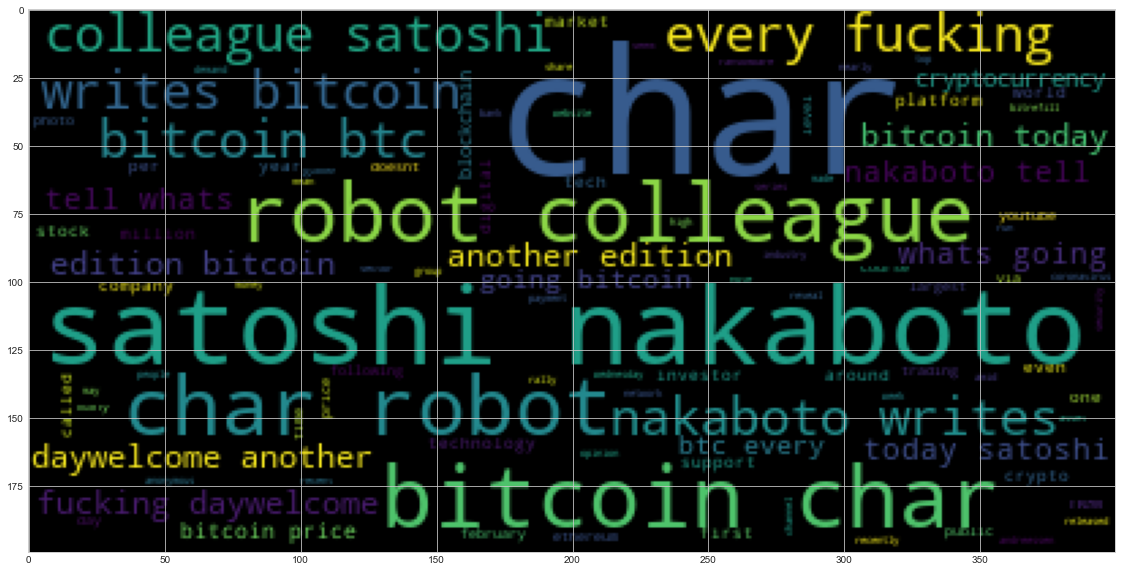

In [128]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(bitcoin_words))
plt.imshow(wc)

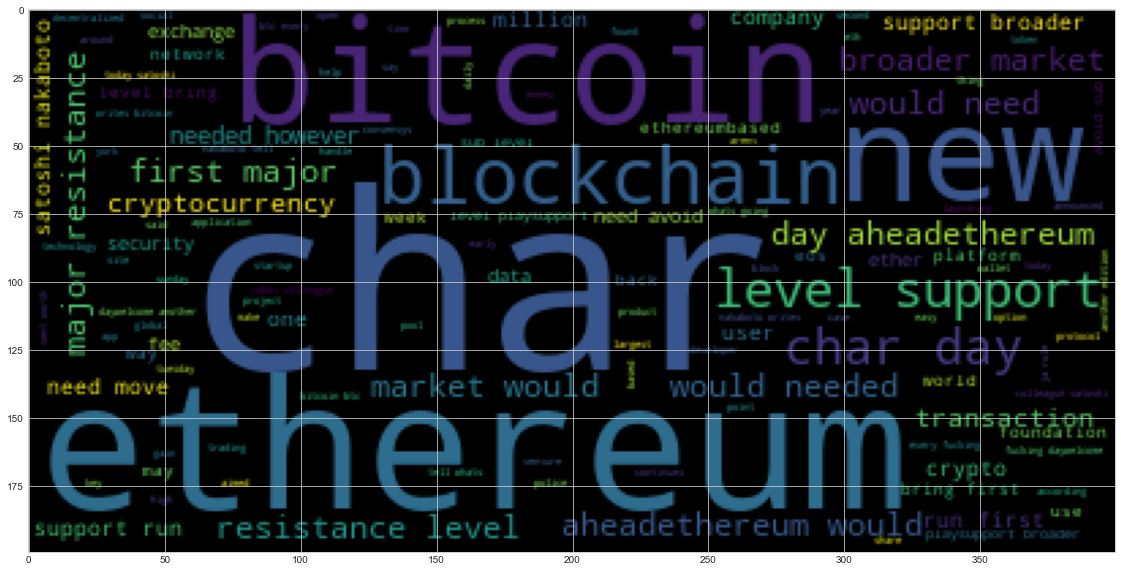

In [129]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ethereum_words))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [130]:
import spacy
from spacy import displacy

In [131]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

## Bitcoin NER

In [ ]:
# Concatenate all of the bitcoin text together
bitcoin_concat = []
for i in bitcoin_sentiment_df['text']:
    bitcoin_concat.append(i)

bitcoin_concat = ' '.join(bitcoin_concat)
bitcoin_concat

In [ ]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_concat)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'

In [ ]:
# Render the visualization
displacy.render(doc, style='ent')

In [ ]:
# List all Entities
entities = set([(ent.text, ent.label_) for ent in doc.ents])
for entity in entities:
    print(entity)

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together
ethereum_concat = []
for i in ethereum_sentiment_df['text']:
    ethereum_concat.append(i)

ethereum_concat = ' '.join(ethereum_concat)
ethereum_concat

In [ ]:
# Run the NER processor on all of the text
ether_doc = nlp(ethereum_concat)

# Add a title to the document
ether_doc.user_data['title'] = 'Ethereum NER'

In [ ]:
# Render the visualization
displacy.render(ether_doc, style='ent')

In [ ]:
# List all Entities
entities = set([(ent.text, ent.label_) for ent in ether_doc.ents])
for entity in entities:
    print(entity)